In [2]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torchvision as tv
import os
import csv

import module.dataloader
import yaml

/home/bcho/micromamba/envs/d/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


I trained deep learning model to classify galaxy types in galaxyzoo2 dataset.  
I used 40000 training images, 10000 testing images.  
I picked 5 classes of highest statistics, containing 10000 training set and 2000 testing set each.
I employed Vision Transformer which receives each image as a group of $16 \times 16$ patches.  
  
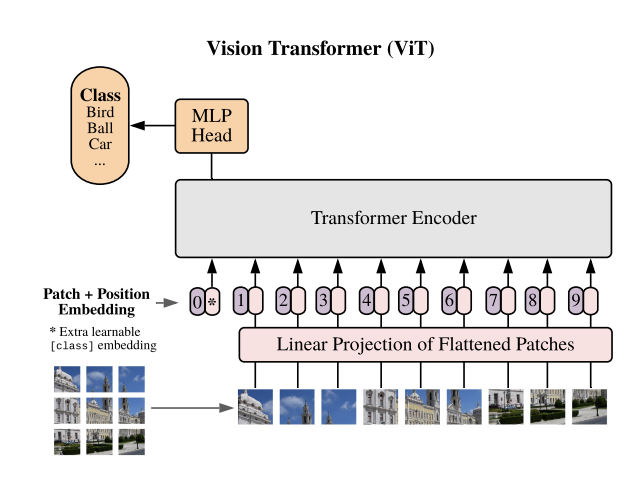

In [10]:
csv_desc=pd.read_csv('zoo2MainSpecz.csv',usecols=['dr7objid','gz2class'])
csv_file=pd.read_csv('gz2_filename_mapping.csv')

# Pick 5 gz2class of Highest statics 

### Ei 
> Smooth galaxies, 'in between' roundness
### Er
> Smooth galaxies, completely round
### Sb
> Oblique disk of which bulge prominence obvious
### Sc
> Oblique disk of which bulge prominence just noticeable
### Ser
> Edge-on disk of which bulge shape is round

In [11]:
csv_desc['gz2class'].value_counts()[:5]

gz2class
Ei     46375
Er     43476
Sb     15548
Sc     14317
Ser    14300
Name: count, dtype: int64

In [15]:
f = th.load('16len/data.pt')

In [16]:
img = th.cat([th.cat([f["images"][(f['ys']==gtype)][i].view(27,27,16,16,3).permute(0,2,1,3,4).reshape(27*16,27*16,3) for i in range(5)],dim=1) for gtype in range(5)], dim=0)

# Example image of galaxies

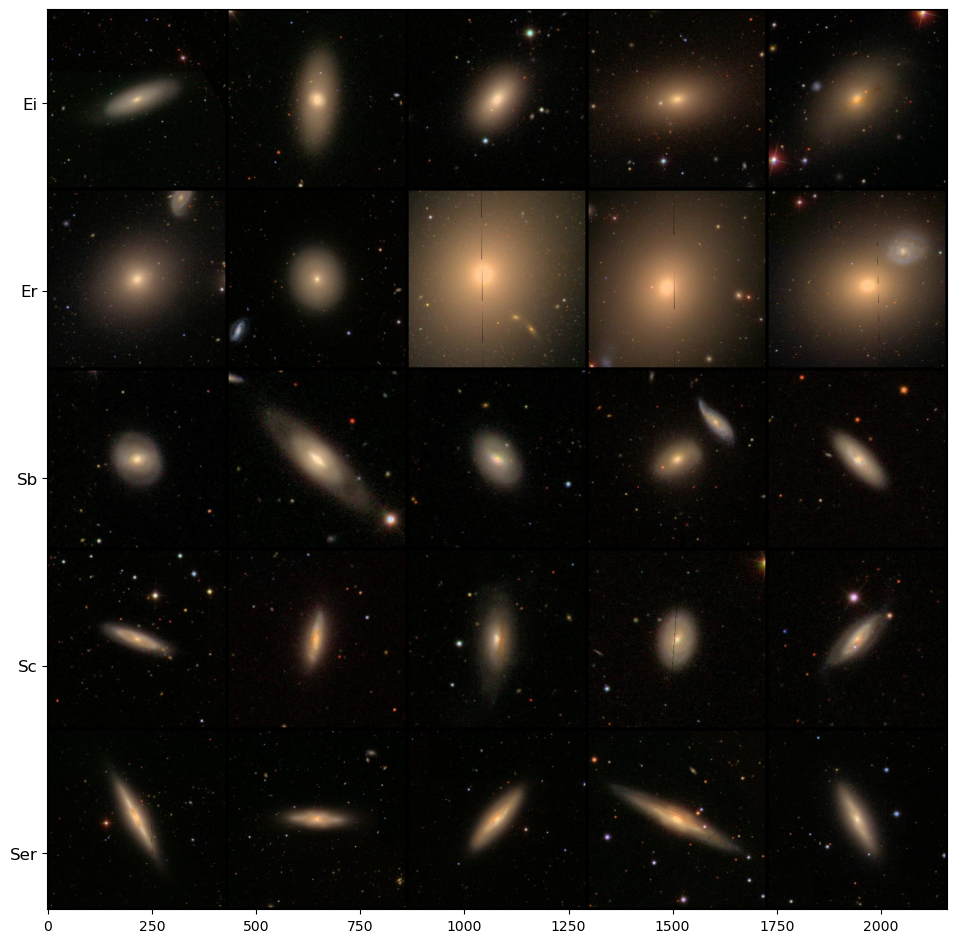

In [17]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_axes((.1,.1,.9,.9))
ax.set_yticks([225,675,1125,1575,2025])
ax.set_yticklabels(['Ei','Er','Sb','Sc','Ser'],fontsize=12)
plt.imshow(img)
#ax.set_xticklabels(['start', 'middel', 'end'], fontsize=12)


# Confusion matrix

![](16len/confusion.png)


### Ei 
> Smooth galaxies, 'in between' roundness
### Er
> Smooth galaxies, completely round
### Sb
> Oblique disk of which bulge prominence obvious
### Sc
> Oblique disk of which bulge prominence just noticeable
### Ser
> Edge-on disk of which bulge shape is round  

# Model is most confused between Sc and Sb. Only difference between them is the degree of bulge prominence. They are relatively so close category, so it's not strange my model is not separating them well
# Overall Accuracy is ~72%, apparently distinct from random classifier